<a href="https://colab.research.google.com/github/pswami12/DataScienceFiles/blob/main/Fraud_Detection_Keras_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
%matplotlib inline

In [2]:
RANDOM_SEED = 42
LABELS = ["Normal", "Fraud"]

In [3]:
df = pd.read_csv("creditcard.csv")

In [4]:
df.shape

(1986, 31)

In [5]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [6]:
count_classes = pd.value_counts(df['Class'], sort = True)
count_classes

0.0    1983
1.0       2
Name: Class, dtype: int64

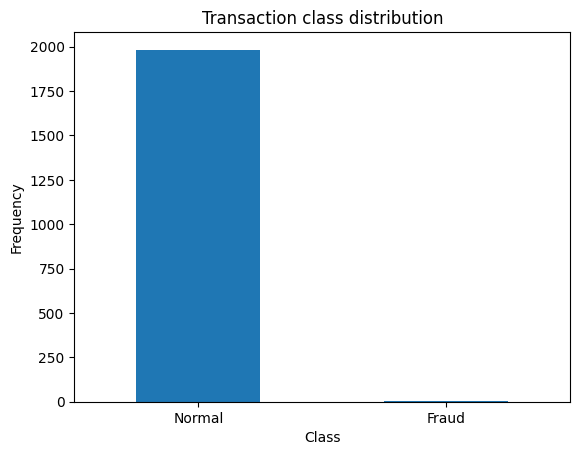

In [7]:
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction class distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency");

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
data = df.drop(['Time'], axis=1)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [10]:
data.loc[:,'V1':'Amount'].describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,...,1985.000000,1985.000000,1985.000000,1985.000000,1985.000000,1985.000000,1985.000000,1985.000000,1985.000000,1985.000000
mean,-0.284195,0.266886,0.848005,0.151216,-0.077457,0.050205,0.138347,-0.058795,0.012145,0.015652,...,0.057684,-0.011611,-0.144319,-0.043045,0.013864,0.108372,0.049408,0.027197,-0.002018,68.602469
std,1.353508,1.142026,1.012645,1.264932,1.272512,1.274204,1.140750,0.966493,0.900828,0.970821,...,0.570735,0.653200,0.588201,0.352890,0.601370,0.407874,0.454251,0.369485,0.272864,241.677019
min,-11.140706,-12.114213,-12.389545,-4.657545,-32.092129,-3.498447,-4.925568,-12.258158,-3.110515,-3.563578,...,-11.748689,-4.709977,-2.776923,-4.020300,-2.162523,-1.577384,-1.243924,-5.336289,-2.738566,0.000000
25%,-1.045512,-0.204111,0.280517,-0.670513,-0.576269,-0.691393,-0.286991,-0.172322,-0.479310,-0.414174,...,-0.129801,-0.226941,-0.547474,-0.181176,-0.350802,-0.151028,-0.281097,-0.049467,-0.021053,4.950000
50%,-0.437621,0.314294,0.864505,0.190698,-0.154843,-0.198063,0.117535,0.037598,-0.034097,-0.091814,...,0.007720,-0.087329,-0.152603,-0.057041,0.093137,0.131713,0.036992,0.023011,0.022722,15.090000
75%,1.095047,0.926126,1.486942,1.002546,0.376901,0.389714,0.569262,0.279513,0.449706,0.329726,...,0.176969,0.083530,0.252698,0.064859,0.428755,0.383339,0.303731,0.140481,0.090920,63.650000
max,1.685314,6.118940,4.017561,6.013346,7.672544,21.393069,34.303177,3.877662,6.450992,11.906868,...,7.744222,6.765928,1.957759,4.095021,1.215279,1.629684,3.463246,3.852046,4.157934,7712.430000


In [11]:
data['Amount'].values

array([149.62,   2.69, 378.66, ...,  80.7 ,   3.59,    nan])

In [12]:
data['Amount'].values.reshape(-1,1)

array([[149.62],
       [  2.69],
       [378.66],
       ...,
       [ 80.7 ],
       [  3.59],
       [   nan]])

In [13]:
data['Amount'].mean()

68.60246851385392

In [14]:
data['Amount'].std()

241.67701857502013

In [15]:
(data['Amount'] - 88.34961925087359)/250.1201092402221

0       0.244964
1      -0.342474
2       1.160684
3       0.140534
4      -0.073403
          ...   
1981   -0.331839
1982   -0.349231
1983   -0.030584
1984   -0.338876
1985         NaN
Name: Amount, Length: 1986, dtype: float64

In [16]:
data['Amount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1, 1))
data['Amount']

0       0.335315
1      -0.272798
2       1.283265
3       0.227210
4       0.005743
          ...   
1981   -0.261789
1982   -0.279793
1983    0.050069
1984   -0.269073
1985         NaN
Name: Amount, Length: 1986, dtype: float64

In [17]:
X = data[data.columns.difference(['Class'])]
y = data['Class']

In [ ]:
y

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [22]:
counts = np.bincount(np.array(y_train))
print(
    "Number of positive samples in training data: {} ({:.2f}% of total)".format(
        counts[1], 100 * float(counts[1]) / len(np.array(y_train))
    )
)

weight_for_0 = 1.0 / counts[0]
weight_for_1 = 1.0 / counts[1]

TypeError: ignored

In [23]:
model = keras.Sequential(
    [
        keras.layers.Dense(
            256, activation="relu", input_shape=(X_train.shape[-1],)
        ),
        keras.layers.Dense(256, activation="relu"),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(256, activation="relu"),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(1, activation="sigmoid"),
    ]
)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               7680      
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               65792     
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 257       
                                                                 
Total params: 139,521
Trainable params: 139,521
Non-trai

In [ ]:
metrics = [
    keras.metrics.FalseNegatives(name="fn"),
    keras.metrics.FalsePositives(name="fp"),
    keras.metrics.TrueNegatives(name="tn"),
    keras.metrics.TruePositives(name="tp"),
    keras.metrics.Precision(name="precision"),
    keras.metrics.Recall(name="recall"),
]

model.compile(
    optimizer=keras.optimizers.Adam(1e-2), loss="binary_crossentropy", metrics=metrics
)

callbacks = [keras.callbacks.ModelCheckpoint("fraud_model_at_epoch_{epoch}.h5")]
class_weight = {0: weight_for_0, 1: weight_for_1}

model.fit(
    X_train,
    y_train,
    batch_size=2048,
    epochs=30,
    verbose=2,
    callbacks=callbacks,
    validation_data=(X_test, y_test),
    class_weight=class_weight,
)

Epoch 1/30
112/112 - 8s - loss: 1.3330e-05 - fn: 67.0000 - fp: 55876.0000 - tn: 171575.0000 - tp: 327.0000 - precision: 0.0058 - recall: 0.8299 - val_loss: 0.3852 - val_fn: 15.0000 - val_fp: 1390.0000 - val_tn: 55474.0000 - val_tp: 83.0000 - val_precision: 0.0563 - val_recall: 0.8469 - 8s/epoch - 73ms/step
Epoch 2/30
112/112 - 6s - loss: 2.8284e-06 - fn: 52.0000 - fp: 10697.0000 - tn: 216754.0000 - tp: 342.0000 - precision: 0.0310 - recall: 0.8680 - val_loss: 0.2402 - val_fn: 11.0000 - val_fp: 1153.0000 - val_tn: 55711.0000 - val_tp: 87.0000 - val_precision: 0.0702 - val_recall: 0.8878 - 6s/epoch - 51ms/step
Epoch 3/30
112/112 - 6s - loss: 2.0974e-06 - fn: 47.0000 - fp: 7964.0000 - tn: 219487.0000 - tp: 347.0000 - precision: 0.0418 - recall: 0.8807 - val_loss: 0.1516 - val_fn: 15.0000 - val_fp: 1130.0000 - val_tn: 55734.0000 - val_tp: 83.0000 - val_precision: 0.0684 - val_recall: 0.8469 - 6s/epoch - 51ms/step
Epoch 4/30
112/112 - 6s - loss: 2.1830e-06 - fn: 40.0000 - fp: 10361.0000 - t